# The Best Landsat 8 Images


For a school project, I needed multiple landsat 8 images for each quarter of a year on four specific WRS-2 path-rows. This notebook is an attempt at determining the best landsat 8 scenes to download for my use case.

I determined the path-rows that i need from https://landsat.usgs.gov/pathrow-shapefiles. I only needed the "Descending only" WRS-2 dataset as these are the daylight passes of landsat8.




For now, I'll use cloudcover as a selection criteria.

In [1]:
PATH_ROWS = [
    [114, 55]
]

### I. Install some dependencies...

In [2]:
! conda install pandas -y

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/benjiao/anaconda3/envs/landsat-scene-selector:
#
pandas                    0.21.0           py36h78bd809_1  


### II. Import dependencies

In [3]:
import pandas
pandas.set_option('display.max_colwidth', -1)

# Show matplot stuff inline
%matplotlib inline

### III. Read Landsat8 Catalog

This was downloaded from https://landsat.usgs.gov/download-entire-collection-metadata. (Almost 1 GB)

In [4]:
scenes = pandas.read_csv('landsat8-scenes.csv')

# Ensure that datetime values are properly typed
scenes["acquisitionDate"] = scenes["acquisitionDate"].astype("datetime64[ns]")

scenes.head()

,browseAvailable,browseURL,sceneID,LANDSAT_PRODUCT_ID,sensor,acquisitionDate,dateUpdated,path,row,upperLeftCornerLatitude,...,GRID_CELL_SIZE_PANCHROMATIC,GRID_CELL_SIZE_THERMAL,ORIENTATION,PANCHROMATIC_LINES,PANCHROMATIC_SAMPLES,REFLECTIVE_LINES,REFLECTIVE_SAMPLES,RESAMPLING_OPTION,THERMAL_LINES,THERMAL_SAMPLES
0,Y,https://earthexplorer.usgs.gov/browse/landsat_8/2017/204/197/LC08_L1GT_204197_20171122_20171122_01_RT.jpg,LC82041972017326LGN00,LC08_L1GT_204197_20171122_20171122_01_RT,OLI_TIRS,2017-11-22,2017-11-22,204,197,18.10451,...,15,30,NORTH_UP,15421,15101,7711,7551,CUBIC_CONVOLUTION,7711,7551
1,Y,https://earthexplorer.usgs.gov/browse/landsat_8/2017/204/196/LC08_L1GT_204196_20171122_20171122_01_RT.jpg,LC82041962017326LGN00,LC08_L1GT_204196_20171122_20171122_01_RT,OLI_TIRS,2017-11-22,2017-11-22,204,196,16.66097,...,15,30,NORTH_UP,15441,15121,7721,7561,CUBIC_CONVOLUTION,7721,7561
2,Y,https://earthexplorer.usgs.gov/browse/landsat_8/2017/204/052/LC08_L1TP_204052_20171122_20171122_01_RT.jpg,LC82040522017326LGN00,LC08_L1TP_204052_20171122_20171122_01_RT,OLI_TIRS,2017-11-22,2017-11-22,204,52,12.61258,...,15,30,NORTH_UP,15521,15201,7761,7601,CUBIC_CONVOLUTION,7761,7601
3,Y,https://earthexplorer.usgs.gov/browse/landsat_8/2017/204/051/LC08_L1TP_204051_20171122_20171122_01_RT.jpg,LC82040512017326LGN00,LC08_L1TP_204051_20171122_20171122_01_RT,OLI_TIRS,2017-11-22,2017-11-22,204,51,14.05751,...,15,30,NORTH_UP,15521,15181,7761,7591,CUBIC_CONVOLUTION,7761,7591
4,Y,https://earthexplorer.usgs.gov/browse/landsat_8/2017/204/050/LC08_L1TP_204050_20171122_20171122_01_RT.jpg,LC82040502017326LGN00,LC08_L1TP_204050_20171122_20171122_01_RT,OLI_TIRS,2017-11-22,2017-11-22,204,50,15.50187,...,15,30,NORTH_UP,15521,15181,7761,7591,CUBIC_CONVOLUTION,7761,7591


### IV. Browse data

In this part, we have peek at what our data looks like.

##### 1. First, we check what columns are available

In [5]:
list(scenes.columns.values)

['browseAvailable',
 'browseURL',
 'sceneID',
 'LANDSAT_PRODUCT_ID',
 'sensor',
 'acquisitionDate',
 'dateUpdated',
 'path',
 'row',
 'upperLeftCornerLatitude',
 'upperLeftCornerLongitude',
 'upperRightCornerLatitude',
 'upperRightCornerLongitude',
 'lowerLeftCornerLatitude',
 'lowerLeftCornerLongitude',
 'lowerRightCornerLatitude',
 'lowerRightCornerLongitude',
 'sceneCenterLatitude',
 'sceneCenterLongitude',
 'cloudCover',
 'cloudCoverFull',
 'dayOrNight',
 'sunElevation',
 'sunAzimuth',
 'receivingStation',
 'sceneStartTime',
 'sceneStopTime',
 'imageQuality1',
 'DATA_TYPE_L1',
 'cartURL',
 'ROLL_ANGLE',
 'GEOMETRIC_RMSE_MODEL',
 'GEOMETRIC_RMSE_MODEL_X',
 'GEOMETRIC_RMSE_MODEL_Y',
 'FULL_PARTIAL_SCENE',
 'NADIR_OFFNADIR',
 'PROCESSING_SOFTWARE_VERSION',
 'CPF_NAME',
 'RLUT_FILE_NAME',
 'BPF_NAME_OLI',
 'BPF_NAME_TIRS',
 'GROUND_CONTROL_POINTS_MODEL',
 'GROUND_CONTROL_POINTS_VERSION',
 'DATE_L1_GENERATED',
 'TIRS_SSM_MODEL',
 'COLLECTION_NUMBER',
 'COLLECTION_CATEGORY',
 'CLOUD_COVE

In [6]:
columns = ["sceneID", "LANDSAT_PRODUCT_ID", "acquisitionDate", "cloudCover", "cartURL", "browseURL"]

##### 2. Let's take a look at the general availability of images by year...

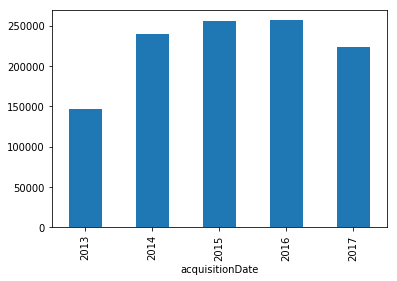

In [7]:
scenes["acquisitionDate"].groupby(
    [scenes["acquisitionDate"].dt.year]).count().plot(kind="bar")

### IV. Filter data based on Path-Rows

Let's try filtering the data using one of the path-row pairs included in my study area.

In [8]:
df1 = scenes[(scenes['path'] == 114) & (scenes['row'] == 54)]
print("{} images found for path-row".format(df1.shape[0]))

103 images found for path-row


##### Plot!

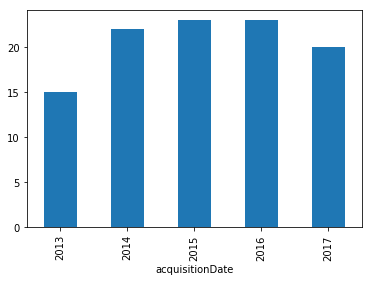

In [9]:
df1["acquisitionDate"].groupby(
    [df1["acquisitionDate"].dt.year]).count().plot(kind="bar")

##### Let's see what the earliest available image is...

In [10]:
df1['acquisitionDate'][df1['acquisitionDate'] == min(df1['acquisitionDate'])]

1118780   2013-04-01
Name: acquisitionDate, dtype: datetime64[ns]

### Fetch data from Q2 2013

As a proof of concept, let's try finding the best image from Q2 2013. Let's also sort them by `cloudCover`

In [11]:
q2_df = df1[columns][(
    (df1['acquisitionDate'].dt.year == 2013) &
    (df1['acquisitionDate'].dt.month >= 4) &
    (df1['acquisitionDate'].dt.month <= 6)
)].sort_values(['cloudCover'])

q2_df.head()

,sceneID,LANDSAT_PRODUCT_ID,acquisitionDate,cloudCover,cartURL,browseURL
1118780,LC81140542013091LGN02,LC08_L1TP_114054_20130401_20170505_01_T1,2013-04-01,0,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140542013091LGN02,https://earthexplorer.usgs.gov/browse/landsat_8/2013/114/054/LC08_L1TP_114054_20130401_20170505_01_T1.jpg
1101984,LC81140542013133LGN02,LC08_L1TP_114054_20130513_20170504_01_T1,2013-05-13,1,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140542013133LGN02,https://earthexplorer.usgs.gov/browse/landsat_8/2013/114/054/LC08_L1TP_114054_20130513_20170504_01_T1.jpg
1114449,LC81140542013101LGN02,LC08_L1TP_114054_20130411_20170505_01_T1,2013-04-11,3,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140542013101LGN02,https://earthexplorer.usgs.gov/browse/landsat_8/2013/114/054/LC08_L1TP_114054_20130411_20170505_01_T1.jpg
1116574,LC81140542013096LGN02,LC08_L1TP_114054_20130406_20170505_01_T1,2013-04-06,3,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140542013096LGN02,https://earthexplorer.usgs.gov/browse/landsat_8/2013/114/054/LC08_L1TP_114054_20130406_20170505_01_T1.jpg
1093135,LC81140542013149LGN01,LC08_L1TP_114054_20130529_20170504_01_T1,2013-05-29,6,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140542013149LGN01,https://earthexplorer.usgs.gov/browse/landsat_8/2013/114/054/LC08_L1TP_114054_20130529_20170504_01_T1.jpg


## V. Run Script on All Path-Rows and on Quarters from 2013 to 2017

Now that we know that the filtering works, lets build a list of images from quarters from 2013 to 2017.

In [12]:
start_year = 2013
end_year = 2017

download_list = []

for path, row in PATH_ROWS:    
    pathrow_df = scenes[(scenes['path'] == path) & (scenes['row'] == row)]

    print("\nPath: {}, Row: {}".format(path, row))
    for year in range(2013, end_year + 1):
        for start_month in range(3, 12, 6):
            filtered_df = pathrow_df[columns][(
                (pathrow_df['acquisitionDate'].dt.year == year) &
                (pathrow_df['acquisitionDate'].dt.month >= start_month) &
                (pathrow_df['acquisitionDate'].dt.month <= start_month + 2)
            )].sort_values(['cloudCover'])
            
            print("{count} images found for {year}-{start_month} to {year}-{end_month}".format(
                count=filtered_df.shape[0],
                path=path,
                row=row,
                year=year,
                start_month=start_month,
                end_month=start_month + 3))
            
            # Add first item of each group into download_list
            if filtered_df.shape[0] != 0:
                download_list.append(filtered_df.head(1))


Path: 114, Row: 55
6 images found for 2013-3 to 2013-6
3 images found for 2013-9 to 2013-12
4 images found for 2014-3 to 2014-6
6 images found for 2014-9 to 2014-12
5 images found for 2015-3 to 2015-6
6 images found for 2015-9 to 2015-12
6 images found for 2016-3 to 2016-6
6 images found for 2016-9 to 2016-12
6 images found for 2017-3 to 2017-6
5 images found for 2017-9 to 2017-12


In [13]:
download_df = pandas.concat(download_list, axis=0, ignore_index=False)
download_df

,sceneID,LANDSAT_PRODUCT_ID,acquisitionDate,cloudCover,cartURL,browseURL
1093134,LC81140552013149LGN01,LC08_L1TP_114055_20130529_20170504_01_T1,2013-05-29,2,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140552013149LGN01,https://earthexplorer.usgs.gov/browse/landsat_8/2013/114/055/LC08_L1TP_114055_20130529_20170504_01_T1.jpg
1000185,LC81140552013325LGN01,LC08_L1TP_114055_20131121_20170428_01_T1,2013-11-21,1,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140552013325LGN01,https://earthexplorer.usgs.gov/browse/landsat_8/2013/114/055/LC08_L1TP_114055_20131121_20170428_01_T1.jpg
916758,LC81140552014104LGN01,LC08_L1TP_114055_20140414_20170423_01_T1,2014-04-14,5,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140552014104LGN01,https://earthexplorer.usgs.gov/browse/landsat_8/2014/114/055/LC08_L1TP_114055_20140414_20170423_01_T1.jpg
764111,LC81140552014328LGN01,LC08_L1TP_114055_20141124_20170417_01_T1,2014-11-24,1,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140552014328LGN01,https://earthexplorer.usgs.gov/browse/landsat_8/2014/114/055/LC08_L1TP_114055_20141124_20170417_01_T1.jpg
682767,LC81140552015075LGN01,LC08_L1TP_114055_20150316_20170412_01_T1,2015-03-16,0,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140552015075LGN01,https://earthexplorer.usgs.gov/browse/landsat_8/2015/114/055/LC08_L1TP_114055_20150316_20170412_01_T1.jpg
517377,LC81140552015315LGN01,LC08_L1TP_114055_20151111_20170402_01_T1,2015-11-11,0,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140552015315LGN01,https://earthexplorer.usgs.gov/browse/landsat_8/2015/114/055/LC08_L1TP_114055_20151111_20170402_01_T1.jpg
379289,LC81140552016142LGN01,LC08_L1TP_114055_20160521_20170324_01_T1,2016-05-21,0,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140552016142LGN01,https://earthexplorer.usgs.gov/browse/landsat_8/2016/114/055/LC08_L1TP_114055_20160521_20170324_01_T1.jpg
254206,LC81140552016318LGN01,LC08_L1TP_114055_20161113_20170318_01_T1,2016-11-13,1,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140552016318LGN01,https://earthexplorer.usgs.gov/browse/landsat_8/2016/114/055/LC08_L1TP_114055_20161113_20170318_01_T1.jpg
171204,LC81140552017080LGN00,LC08_L1TP_114055_20170321_20170328_01_T1,2017-03-21,2,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140552017080LGN00,https://earthexplorer.usgs.gov/browse/landsat_8/2017/114/055/LC08_L1TP_114055_20170321_20170328_01_T1.jpg
16483,LC81140552017304LGN00,LC08_L1TP_114055_20171031_20171109_01_T1,2017-10-31,2,https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140552017304LGN00,https://earthexplorer.usgs.gov/browse/landsat_8/2017/114/055/LC08_L1TP_114055_20171031_20171109_01_T1.jpg


In [14]:
download_df.shape[0]

10

Save download candidates into CSV

In [15]:
download_df.to_csv("for-download.csv")

## VII. Create an Order URL Containing All Scenes

We can then follow this link and download the dataset from USGS.

In [16]:
order_url = "https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered={}".format(
    ",".join(download_df['sceneID'].values))

print(order_url)

https://earthexplorer.usgs.gov/order/process?dataset_name=LANDSAT_8_C1&ordered=LC81140552013149LGN01,LC81140552013325LGN01,LC81140552014104LGN01,LC81140552014328LGN01,LC81140552015075LGN01,LC81140552015315LGN01,LC81140552016142LGN01,LC81140552016318LGN01,LC81140552017080LGN00,LC81140552017304LGN00
